<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env" data-toc-modified-id="env-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env</a></span></li><li><span><a href="#a-sample-situation-for-initial-density-matters" data-toc-modified-id="a-sample-situation-for-initial-density-matters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>a sample situation for initial density matters</a></span><ul class="toc-item"><li><span><a href="#data-import" data-toc-modified-id="data-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>data import</a></span></li><li><span><a href="#plots" data-toc-modified-id="plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plots</a></span></li></ul></li></ul></div>

# env

In [1]:
include("../code/func.jl")
rAw = CSV.read("../result/maxYield_ALL.csv")
println()

In [2]:
describe(rAw)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,x,0.5,0.0,0.5,1.0,,,Float64
2,e_PR,0.875,0.875,0.875,0.875,,,Float64
3,e_P,0.63,0.63,0.63,0.63,,,Float64
4,g_P,0.407555,0.259,0.4075,0.556,,,Float64
5,a_P,0.200491,0.001,0.2004,0.4,,,Float64
6,e_BR,0.6,0.6,0.6,0.6,,,Float64
7,e_B,0.55,0.55,0.55,0.55,,,Float64
8,g_B,4.85839,0.707,4.86,9.01,,,Float64
9,m_B,0.14,0.14,0.14,0.14,,,Float64


number of parameter sets failed in R integration under initial carbon densities at 1e-12

In [3]:
fAil = DataFrame(zeros(0,9))
rename!(fAil,names(rAw)[1:9])
for i in Array(CSV.read("p_tmp/filL.csv", header=false))
    push!(fAil,rAw[i,names(rAw)[1:9]])
end
size(fAil)

(33637, 9)

# a sample situation for initial density matters
## data import

number of parameter sets failed in both R & py3 integrations under initial carbon densities at 1e-12

In [4]:
fAl = CSV.read("failSit.csv")
size(fAl)

(1122, 1)

In [5]:
function ePlt(df,liSt,num,iniPop)
    eQm = Array(ebcAlt(df[liSt[num],:]))
    xx = similar(eQm)
    for i in 1:size(xx)[1]; for j in 1:size(xx)[2]
        xx[i,j] = 1000
            end;end
    a = ebcData(1000,iniPop,df[liSt[num],:])
    a0 = DataFrame(a)
    a1 = [round(Array(a0[size(a0)[1],:])[i]; digits=4) for i in 1:4]
    plot(a, ylim = [-100,maximum(eQm[4,:])*1.1], label=[i*"-num" for i in ["C" "P" "B" "A"]], legend=:top, title="Final:\nC = "*string(a1[1])*"\nP = "*string(a1[2])*"\nB = "*string(a1[3])*"\nA = "*string(a1[4]))
    scatter!(xx,eQm, label=["eqm-"*string(i) for i in [1 2 3 4]], m=(.5, [:star1 :star2 :star4 :star7], 5))
end

ePlt (generic function with 1 method)

## plots

In [6]:
ebcAlt(fAil[Array(fAl)[1],:])

,C,P,B,A
,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0
2,0.27602,0.0,-0.569291,-0.293271
3,92.446,142.774,0.0,235.22
4,0.27602,142.774,190.101,333.15


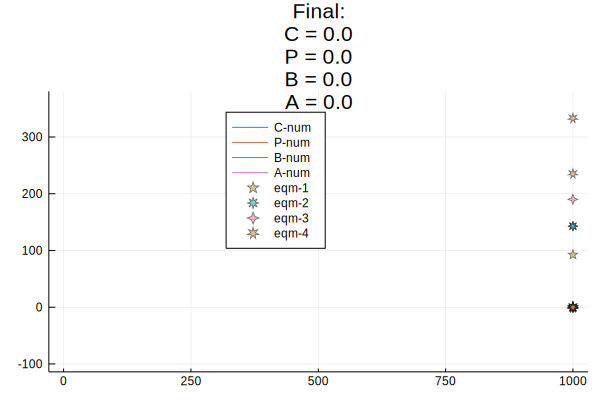

In [7]:
ePlt(fAil,Array(fAl),1,1e-12)

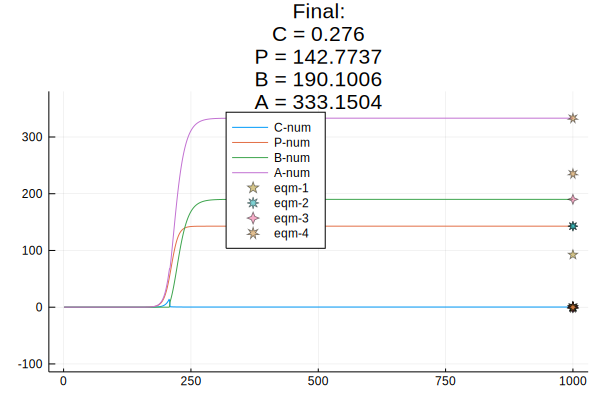

In [8]:
ePlt(fAil,Array(fAl),1,1e-11)

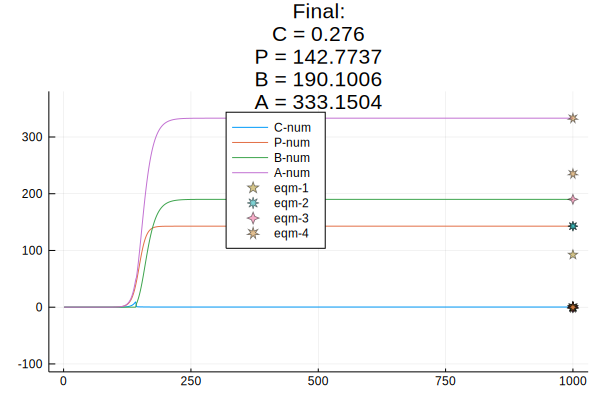

In [9]:
ePlt(fAil,Array(fAl),1,1e-07)

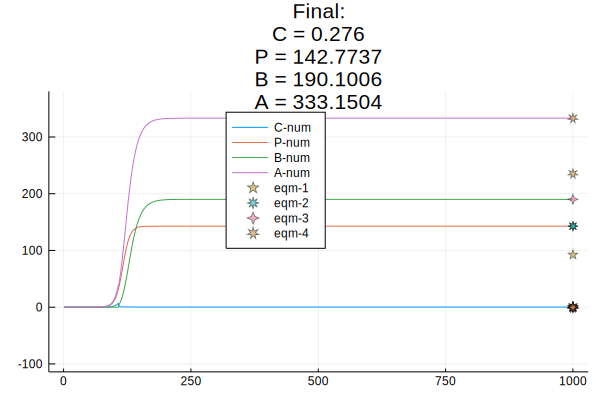

In [10]:
ePlt(fAil,Array(fAl),1,1e-05)

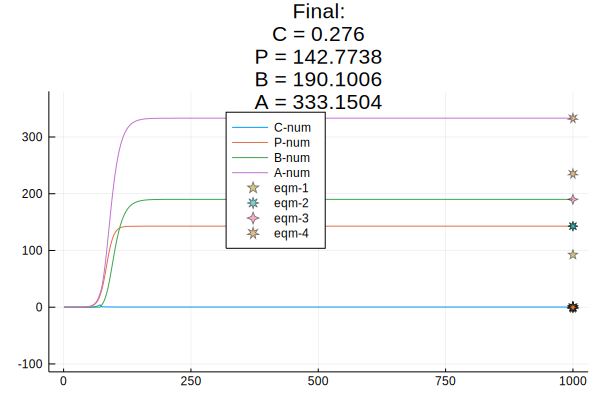

In [11]:
ePlt(fAil,Array(fAl),1,1e-03)

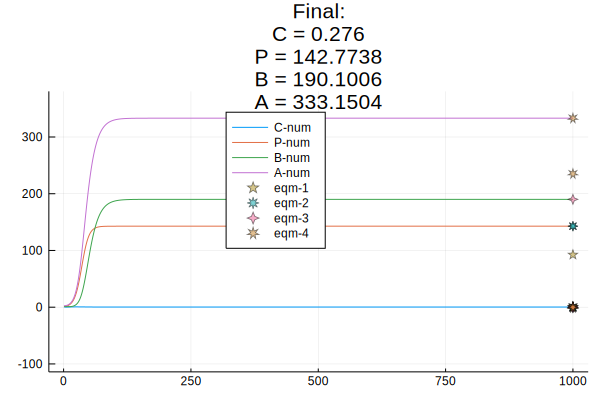

In [12]:
ePlt(fAil,Array(fAl),1,1e-00)